<a href="https://colab.research.google.com/gist/manojkumark04/c673e39dfa097031deadf3c3438bc1b4/manoj_assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [121]:
import pandas as pd

df = pd.read_fwf("/content/drive/MyDrive/task/brain_body.txt")
print(df)

      Brain   Body
0     3.385   44.5
1     0.480   15.5
2     1.350    8.1
3   465.000  423.0
4    36.330  119.5
..      ...    ...
57  160.000  169.0
58    0.900    2.6
59    1.620   11.4
60    0.104    2.5
61    4.235   50.4

[62 rows x 2 columns]


In [122]:
# import pandas as pd

# # Read the CSV file into a DataFrame
# df = pd.read_csv('/content/drive/MyDrive/task/brain_body.txt')

# # Convert the DataFrame to a JSON object
# json_data = df.to_json(orient='records')

# # Write the JSON object to a file
# with open('json_file.json', 'w') as f:
#     f.write(json_data)




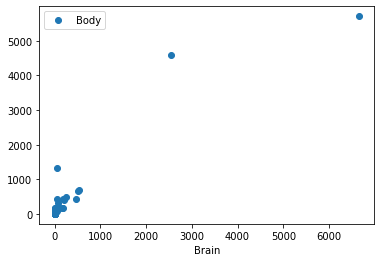

In [123]:
df.plot(x = "Brain", y = "Body", style = "o")

In [124]:
df.shape

(62, 2)

In [125]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [126]:
from scipy.stats import zscore
df["brain_zscore"] = zscore(df["Brain"])
df["body_zscore"] = zscore(df["Body"])

In [127]:
df = df.loc[df["brain_zscore"].abs()<=3]
df = df.loc[df["body_zscore"].abs()<=3]

In [128]:
df.drop(["brain_zscore", "body_zscore"],axis = 1, inplace = True)

In [129]:
df.corr()

,Brain,Body
Brain,1.000000,0.650559
Body,0.650559,1.000000


In [130]:
df.describe()

,Brain,Body
count,60.000000,60.000000
mean,52.066317,120.655333
std,119.468888,228.212145
min,0.005000,0.140000
25%,0.532500,3.975000
50%,3.150000,16.250000
75%,35.332500,128.875000
max,529.000000,1320.000000


In [131]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [132]:
y = pd.Series(df["Body"])

In [133]:
x = df[df.columns[1:]].to_numpy()

In [134]:
y = np.array(y)

In [135]:
model = LinearRegression()

In [136]:
model.fit(x,y)

LinearRegression()

In [137]:
model.predict([[7.5]])

array([7.5])

In [138]:
r2 = model.score(x,y)
print("coefficient of determination", r2)

coefficient of determination 1.0


# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [139]:
ground_cricket_data = {"Chirps": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
dataset = pd.DataFrame(ground_cricket_data)

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [141]:


import numpy as np
from sklearn.linear_model import LinearRegression

In [142]:
print(dataset.shape)
dataset

(15, 2)


,Chirps,Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [143]:
dataset.describe()

,Chirps,Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [144]:
dataset.Temperature.quantile(0.25)

73.4

In [145]:
iqr = dataset.Temperature.quantile(.75) - dataset.Temperature.quantile(0.25)
upper_threshold = dataset.Temperature.quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset.Temperature.quantile(0.25) - (1.5 * iqr)
print(upper_threshold)
lower_threshold


98.4


58.400000000000006

In [146]:
dataset.isnull().sum()

Chirps         0
Temperature    0
dtype: int64

In [147]:
dataset = dataset.drop_duplicates()
dataset.shape

(15, 2)

In [148]:
dataset.dtypes

Chirps         float64
Temperature    float64
dtype: object

In [149]:
import numpy as np
temp = np.array(pd.Series(dataset["Temperature"]))
chirps = np.array(pd.Series(dataset["Chirps"]))


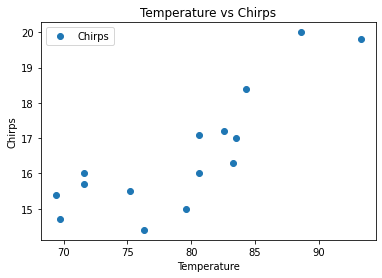

In [150]:
dataset.plot(x = "Temperature", y = "Chirps", style = "o")
plt.title("Temperature vs Chirps")
plt.xlabel("Temperature")
plt.ylabel("Chirps")
plt.show()

In [151]:
dataset.corr()

,Chirps,Temperature
Chirps,1.000000,0.832042
Temperature,0.832042,1.000000


In [152]:
dataset.Chirps.values

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [153]:
X = dataset.loc[:, ["Temperature"]].values
y = dataset.loc[:, ["Chirps"]].values

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
y_test

array([[14.7],
       [15.5],
       [16. ]])

In [155]:
X_train.shape

(12, 1)

In [156]:
X_test.shape

(3, 1)

In [157]:
print(type(X_train))

<class 'numpy.ndarray'>


**Scaling** **data**

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


**MODEL CREATION**

In [159]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [160]:
print(regressor.intercept_)

[16.85833333]


In [161]:
# Get the coefficients and intercept of the model
coef = regressor.coef_[0][0]
intercept = regressor.intercept_[0]

# Construct the linear regression equation
equation = f"y = {coef:.2f}x + {intercept:.2f}"
print(equation)


y = 1.39x + 16.86


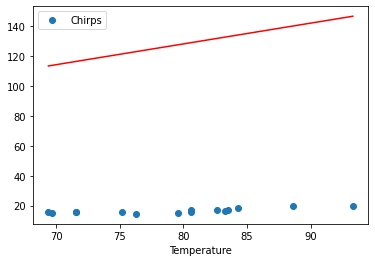

In [162]:
import matplotlib.pyplot as plt

# Plot the data points
dataset.plot(x='Temperature', y='Chirps', style='o')

# Plot the line
x = np.linspace(dataset['Temperature'].min(), dataset['Temperature'].max())
y = coef * x + intercept
plt.plot(x, y, color='red')

# Show the plot
plt.show()


In [163]:
print(regressor.coef_)

[[1.39283133]]


In [164]:
regressor.predict([[90]])

array([[142.2131531]])

In [165]:
y_pred = regressor.predict(X_test)

In [166]:
y_test

array([[14.7],
       [15.5],
       [16. ]])

In [167]:
y_pred

array([[14.68825171],
       [15.80458364],
       [16.90061863]])

In [168]:
from sklearn import metrics 

In [169]:
print("R2-score:", metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R2-score: -0.05118969930784645


-0.05118969930784645

In [170]:
# Calculate the ground temperature
temperature = (18 - intercept) / coef
print(f"Ground temperature: {temperature:.2f}")


Ground temperature: 0.82


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [172]:
# dr= pd.read_fwf("/content/drive/MyDrive/task/salary.txt", header = None, names = ["Sex","Rank","Year","Degree","YSdeg","Salary"])
# dr

In [ ]:
df = pd.read_fwf("/content/drive/MyDrive/task/salary.txt", header = None, names = ["Sex","Rank","Year","Degree","YSdeg","Salary"])
df

In [174]:
print(df.shape)
print(df.describe())


(52, 6)
             Sex       Rank       Year     Degree      YSdeg        Salary
count  52.000000  52.000000  52.000000  52.000000  52.000000     52.000000
mean    0.269231   2.038462   7.480769   0.653846  16.115385  23797.653846
std     0.447888   0.862316   5.507536   0.480384  10.222340   5917.289154
min     0.000000   1.000000   0.000000   0.000000   1.000000  15000.000000
25%     0.000000   1.000000   3.000000   0.000000   6.750000  18246.750000
50%     0.000000   2.000000   7.000000   1.000000  15.500000  23719.000000
75%     1.000000   3.000000  11.000000   1.000000  23.250000  27258.500000
max     1.000000   3.000000  25.000000   1.000000  35.000000  38045.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


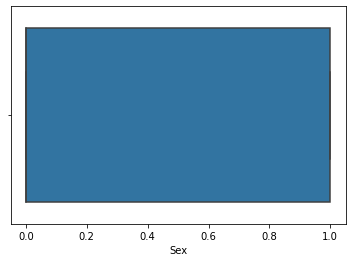

In [175]:
import seaborn as sns
sns.boxplot(df['Sex'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


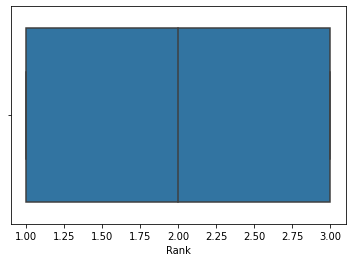

In [176]:
import seaborn as sns
sns.boxplot(df['Rank'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


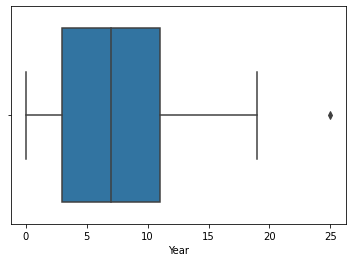

In [177]:
import seaborn as sns
sns.boxplot(df['Year'])


In [178]:
from scipy import stats
df["Year_Zscore"] = stats.zscore(df["Year"])
df = df.loc[df["Year_Zscore"].abs()<=3]

df

,Sex,Rank,Year,Degree,YSdeg,Salary,Year_Zscore
1,0,3,13,1,22,35350,1.011900
2,0,3,10,1,23,28200,0.461878
3,1,3,7,1,27,26775,-0.088145
4,0,3,19,0,30,33696,2.111945
5,0,3,16,1,21,28516,1.561923
6,1,3,0,0,32,24900,-1.371531
7,0,3,16,1,18,31909,1.561923
8,0,3,13,0,30,31850,1.011900
9,0,3,13,0,31,32850,1.011900
10,0,3,12,1,22,27025,0.828560


In [179]:
df.drop('Year_Zscore', axis=1, inplace=True)
df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Sex,Rank,Year,Degree,YSdeg,Salary
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850
10,0,3,12,1,22,27025


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


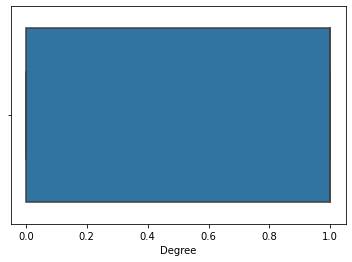

In [180]:
import seaborn as sns
sns.boxplot(df['Degree'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


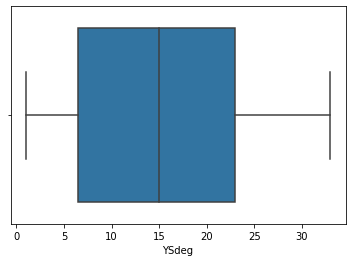

In [181]:
import seaborn as sns
sns.boxplot(df['YSdeg'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


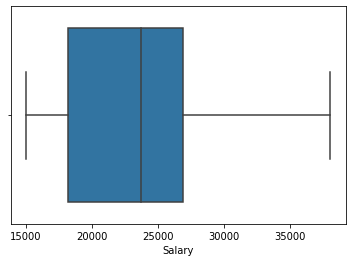

In [182]:
import seaborn as sns
sns.boxplot(df['Salary'])

In [183]:
def outlier(df,column):
  global lower, upper
  Q1 = np.quantile(df[column],0.25)
  Q3 = np.quantile(df[column],0.75)
  IQR = Q3 - Q1
  threshold = 1.5 * IQR
  lower = Q1 - threshold
  upper = Q3 - threshold
  lower_bound = df[df[column] < lower]
  upper_bound = df[df[column] > upper]
  
  print("IQR is",IQR)
  print("Threshold is", threshold)
  # print("Lower bound is", lower_bound)
  # print("Upper bound is", upper_bound)
  return print("Total outliers are ", lower_bound.shape[0] + upper_bound.shape[0])

In [184]:
outlier(df,"Salary")

IQR is 8710.5
Threshold is 13065.75
Total outliers are  51


In [185]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.274510,2.019608,7.137255,0.647059,15.745098,23551.529412
std,0.450708,0.860005,4.967976,0.482640,9.965627,5701.015742
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.500000,18189.500000
50%,0.000000,2.000000,7.000000,1.000000,15.000000,23713.000000
75%,1.000000,3.000000,10.500000,1.000000,23.000000,26900.000000
max,1.000000,3.000000,19.000000,1.000000,33.000000,38045.000000


In [186]:
iqr = df.Sex.quantile(0.75) - df.Sex.quantile(0.25)
upper_threshold = df.Sex.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Sex.quantile(0.25) - (1.5 * iqr)
print(upper_threshold)
lower_threshold

2.5


-1.5

In [187]:
iqr = df.Rank.quantile(0.75) - df.Rank.quantile(0.25)
upper_threshold = df.Rank.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Rank.quantile(0.25) - (1.5 * iqr)
print(upper_threshold)
lower_threshold

6.0


-2.0

In [188]:
iqr = df.Year.quantile(0.75) - df.Year.quantile(0.25)
upper_threshold = df.Year.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Year.quantile(0.25) - (1.5 * iqr)
print(upper_threshold)
lower_threshold

21.75


-8.25

In [189]:
iqr = df.Degree.quantile(0.75) - df.Degree.quantile(0.25)
upper_threshold = df.Degree.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Degree.quantile(0.25) - (1.5 * iqr)
print(upper_threshold)
lower_threshold

2.5


-1.5

In [190]:
iqr = df.YSdeg.quantile(0.75) - df.YSdeg.quantile(0.25)
upper_threshold = df.YSdeg.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.YSdeg.quantile(0.25) - (1.5 * iqr)
print(upper_threshold)
lower_threshold

47.75


-18.25

In [191]:
iqr = df.Salary.quantile(0.75) - df.Salary.quantile(0.25)
upper_threshold = df.Salary.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Salary.quantile(0.25) - (1.5 * iqr)
print(upper_threshold)
lower_threshold

39965.75


5123.75

In [ ]:
sex = df.loc[0:,:"Sex"]
salary = df.loc[:,"Salary":]
salary

In [193]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [194]:
df = df.drop_duplicates()
df.shape

(51, 6)

In [195]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [197]:
# width = 0.40
  
# # plot data in grouped manner of bar type
# plt.bar(x-0.2, y1, width)
# plt.bar(x+0.2, y2, width)

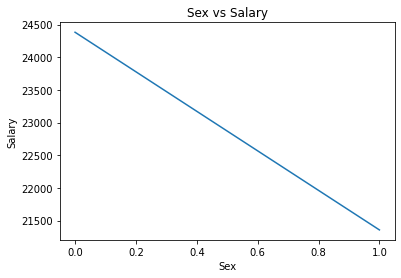

In [206]:
df.groupby('Sex')['Salary'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

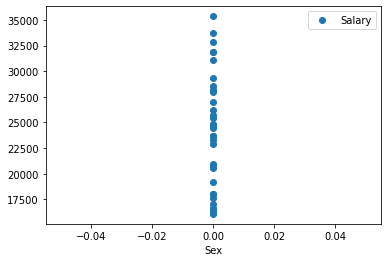

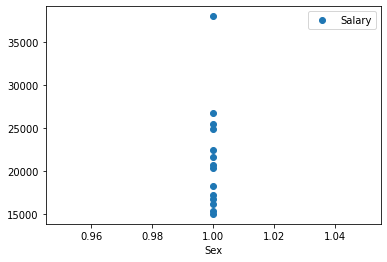

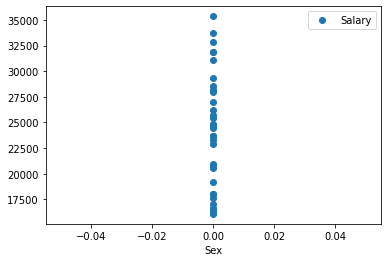

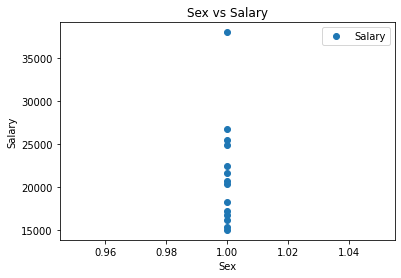

In [199]:
grouped_df = df.groupby('Sex')
grouped_df.plot(x='Sex', y='Salary', style='o')
import matplotlib.pyplot as plt

# Plot the data points
grouped_df.plot(x='Sex', y='Salary', style='o')

# Add a title, x-axis label, and y-axis label
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')

# Add a legend
plt.legend()

# Show the plot
plt.show()


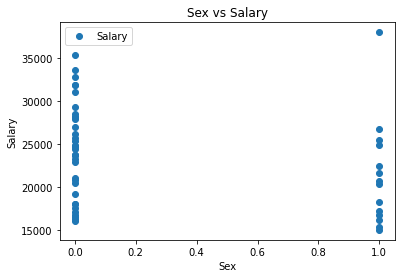

In [198]:
df.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

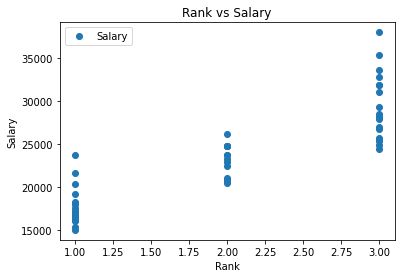

In [201]:
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

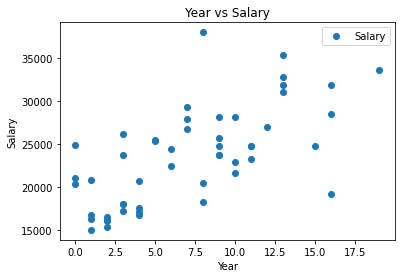

In [202]:
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

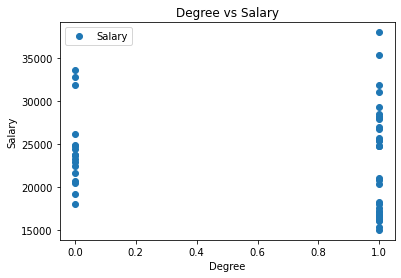

In [203]:
df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

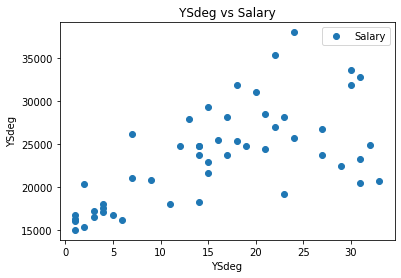

In [204]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('YSdeg')
plt.show()

In [208]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [213]:
X = df[["Sex", "Rank","Year", "Degree","YSdeg"]].values #array of features
y = df["Salary"].values #array of targets

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [215]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [218]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)


LinearRegression()

In [219]:
coeff_df = pd.DataFrame(regressor.coef_,["Sex", "Rank","Year", "Degree","YSdeg"], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,873.502554
Rank,5344.650829
Year,2413.515118
Degree,-808.764972
YSdeg,-1819.276918


In [221]:
regressor.predict(scaler.transform(np.array([[11,5000,0.6,85,5]])))

array([30796982.95253133])

In [222]:
regressor.intercept_ # c 

23909.825

In [223]:
y_pred = regressor.predict(X_test)

In [224]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,17250,31101.928009
1,15000,29913.451610
2,20525,-2490.336870
3,22906,31445.124059
4,27025,28073.101722
5,23713,25506.235031
6,20850,19830.384538
7,27959,32379.018399
8,24832,33680.674724
9,19175,26027.348589


In [225]:
from sklearn import metrics 

In [226]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -6.020565295247365
